# Elements of Data Science: A First Course 

# COMS W4995 008 2017 3


## Week 5: Classification and Regression

## Reading: 



## Today

- Supervised Machine Learning
    - Examples
    - Definitions

- Regression Methods
    - Simple Linear
    - Multivariate
    - Polynomial

- Classification Methods
    - k Nearest Neighbor
    - Logistic Regression
    - Naive Bayes
    - Trees and Forests
    - SVMs

- Training, Testing and Generalization
    - Train/Test
    - Overfitting and Underfitting
    - Regularization

## Supervised Machine Learning

### Examples

### Definitions

- $x_i$ is an observation 
    - a row in our DataFrame

- $x_i$ is a vector of length $m \in 1,2,\ldots$ 
    - the columns in our DataFrame

- $y_i$ is the label for observation $x_i$
    - the thing we want to predict

Using a training set of $(x_i,y_i)_{i=1:n}$ pairs, find a function that maps $x$ to $y$:

> $\Large f : f(x) \mapsto y$

- Is $y$ a real number ($y \in \mathbf{R}$)? 
    - <i>Regression</i>
    - e.g. temperature, stock price, heart rate
    

- Is $y$ a category or class ($y \in \{c_1,c_2,\ldots\}$)? 
    - <i> Classification</i>
    - e.g. positive/negaitve, sunny/cloudy/rainy, yes/no loan default risk 

#### Other types of Machine Learning

- Unsupervised
    - Clustering
    - Dimensionality Reduction
    - etc...
    

- Reinforcement Learning
    - Pathfinding
    - Task Completion
    - etc...

## Regression Methods

### Simple Linear Regression ($m = 1$)

> $\Large y = ax + b$

> $\Large y_i = \beta_1 x_i + \beta_0$

In [1]:
import seaborn as sns
%matplotlib inline

In [2]:
tips = sns.load_dataset("tips")

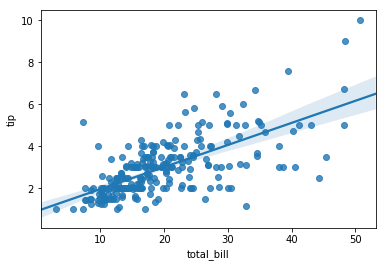

In [3]:
sns.regplot(x="total_bill", y="tip", data=tips);

In [4]:
from sklearn.linear_model import LinearRegression 

regr = LinearRegression()

In [5]:
X = tips['total_bill'].values.reshape(-1,1)
y = tips['tip']

regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
print('beta_0 = {:0.3f}'.format(regr.intercept_))

beta_0 = 0.920


In [7]:
print('beta_1 = {:0.3f}'.format(regr.coef_[0]))

beta_1 = 0.105


### Simple Polynomial Regression ($m=1$)

$$
\Large y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2
$$

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [9]:
poly = PolynomialFeatures()
poly.fit_transform(X[:3])

array([[   1.    ,   16.99  ,  288.6601],
       [   1.    ,   10.34  ,  106.9156],
       [   1.    ,   21.01  ,  441.4201]])

$$\Large \begin{align}
x_{i,0} &= 1 \quad \forall x_i \in X \\
\end{align}
$$

$$
\Large y_i = \beta_0 x_{i,0} + \beta_1 x_{i,1} + \beta_2 x_{i,1}^2
$$

In [10]:
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])

In [11]:
model = model.fit(X, y)

In [12]:
for i in range(3):
    print('beta_{:} = {:0.3}'.format(i,model.named_steps['linear'].coef_[i]))

beta_0 = 0.891
beta_1 = 0.108
beta_2 = -5.71e-05


### Multivariate Linear Regression ($m > 1$)

$$\Large 
\begin{align}
y_i &= \beta_0 x_{i,0} + \beta_1 x_{i,1} + \beta_2 x_{i,2} + \ldots + \beta_m x_{i,m} \\
    & = \sum_{j = 0}^{m} \beta_{j}x_{i,j} \\
    & =  \beta x_i
\end{align}
$$

In [13]:
import numpy as np
tips['x_0'] = 1
X = tips[['x_0','total_bill','size']].values

In [14]:
regr = LinearRegression(fit_intercept=False)

In [15]:
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [16]:
for i in range(3):
    print('beta_{:} = {:0.3}'.format(i,regr.coef_[i]))

beta_0 = 0.669
beta_1 = 0.0927
beta_2 = 0.193


In [17]:
from scipy.stats import pearsonr

pearsonr(tips['total_bill'], tips['size'])

(0.5983151309049014, 4.3935101424771882e-25)

In [18]:
tips['total_bill_per_person'] = tips['total_bill'] / tips['size']

In [19]:
pearsonr(tips['total_bill_per_person'], tips['size'])

(-0.17541201654288813, 0.0060090647989592457)

In [20]:
X = tips[['x_0','total_bill_per_person','size']].values
regr.fit(X,y)
for i in range(3):
    print('beta_{:} = {:0.3}'.format(i,regr.coef_[i]))

beta_0 = -0.798
beta_1 = 0.212
beta_2 = 0.826


In [21]:
tips.x_0 = 0

X = tips[['x_0','total_bill_per_person','size']].values

regr.fit(X,y)
for i in range(3):
    print('beta_{:} = {:0.3}'.format(i,regr.coef_[i]))

beta_0 = 0.0
beta_1 = 0.164
beta_2 = 0.679


## Aside: Prediction Vs. Explanation

In [24]:
regr.fit(X,y)
for i in range(3):
    print('beta_{:} = {:0.3}'.format(i,regr.coef_[i]))

beta_0 = 0.0
beta_1 = 0.164
beta_2 = 0.679


In [23]:
regr.predict(np.array([0,100.00,1]).reshape(1, -1))

array([ 17.10385005])

## Training, Testing and Generalization

### Train/Tune?/Test

In [25]:
from sklearn.model_selection import train_test_split

### Overfitting and Underfitting

- Overfitting: poor generalization due to complexity

- Underfitting: poor generalization due to simplicity

## Classification Methods

### k Nearest Neighbor

> "What is the category of most of the $k$ nearest neighbors to $x_i$?"

1. Find k nearest neighbors
2. Take a (weighted?) majority vote

Need to define: 
- k
- what "close" means (***distance metric***)

> Q: What does the machine learn?

- fast to train
- potentially slow to predict

### Logistic Regression

> "If we use a squashing function on a linear regression, we can get a classification."

In [ ]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(diabetes.data[:, 2].reshape(-1,1), diabetes.target)

In [ ]:
regr = LinearRegression()
regr.fit(X_train,y_train)

In [ ]:
y_pred = regr.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.scatter(X_test,y_test, color='k')
plt.plot(X_test,y_pred, linewidth=3)
plt.xlabel('bmi')
plt.ylabel('progression')

In [ ]:
y_train_new = y_train > 150
y_test_new = y_test > 150

In [ ]:
plt.scatter(X_test,y_test_new, color='k')
regr.fit(X_train,y_train_new)
y_pred = regr.predict(X_test)
plt.plot(X_test,y_pred, linewidth=3)

- Use the "squashing" function $\sigma$

$$
\Large \sigma(\beta_1 x_i + \beta_0) = \frac{1}{1-e^{-\left(\beta_1 x_i + \beta_0\right)}}
$$

$$ 
\Large
y_i = 
\begin{cases}
1 &\text{if } \sigma (\beta_1 x_i + \beta_0) > 0.5, \\ 
0 &\text{o.w.}
\end{cases}
$$

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()
logreg

In [ ]:
logreg.fit(X_train,y_train_new)
y_pred = logreg.predict(X_test)

In [ ]:
tmp = np.array(sorted(zip(X_test,y_pred), key=lambda x:x[0]))
plt.scatter(X_test,y_test_new, color='k')
plt.plot(tmp[:,0],tmp[:,1], linewidth=3)

In [ ]:
- interpretable
- sensitive to scaling of variables

### Naive Bayes

> "If we know ***how likely a class is***, and ***how likely the observation is given the class***, we can guess which class is the better fit"

#### Bayes rule

$$
\Large p(A \mid B) = \frac{P(B \mid A) P(A)}{P(B)}
$$

$$
\Large p(y_i = 1 \mid x_i) = \frac{P(x_i \mid y_i) P(y_i)}{P(x_i)}
$$

#### Naive Bayes Classifier
$$
\Large \hat{y}_i = \arg\max_{c \in {0,1,\ldots}} p(x_i \mid \hat{y}_i = c) p(\hat{y}_i = c)
$$

- simple
- depends on strong independence assumption
- data scarcity
- need to deal with real values

### Trees and Forests

#### Decision Tree

> "If we ask a bunch of yes no questions, we can get to an answer."

#### (Ensemble of Decision Trees) Random Forest and Gradient Boost

> "If we train a bunch of weak learners, the majority vote will give us an answer."

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc

- very interpretable
- tendency to overfit

#### Ensembles and variance

- collection of weak learners

- Random forest - variation with random selection of features

- Gradient Boost - variation due to changes in observation weight

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc

- less interpretable
- longer to train, fast to evaluate

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc

- slower to train
- performs well in the field

### SVMs

> "Can we find the line/plane that separates our classes, with the largest margin."

<img src="http://docs.opencv.org/2.4/_images/separating-lines.png">

<img src="http://docs.opencv.org/2.4/_images/optimal-hyperplane.png">

- slow to learn
- fast to evaluate
- can use kernel trick to learn non-linear functions

### Regularization